<a href="https://colab.research.google.com/github/amansingh202/Machine-Learning/blob/main/BA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import openai
import os
import streamlit as st

openai.api_key = os.getenv('OPENAI_API_KEY')


In [ ]:
data = {
    'Quarter': ['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023'],
    'Energy_Demand': [50000, 55000, 60000, 65000],
    'Energy_Supply': [48000, 54000, 61000, 66000],
    'Region': ['Chicago', 'Chicago', 'Chicago', 'Chicago']  # All rows reflect Chicago
}
energy_df = pd.DataFrame(data)


# Display the dataset
print("Sample Energy Demand Dataset:")
print(energy_df)


Sample Energy Demand Dataset:
   Quarter  Energy_Demand  Energy_Supply   Region
0  Q1-2023          50000          48000  Chicago
1  Q2-2023          55000          54000  Chicago
2  Q3-2023          60000          61000  Chicago
3  Q4-2023          65000          66000  Chicago


In [ ]:
# Base Agent Class with receive_task()
class Agent:
    def __init__(self, name):
        self.name = name
        self.assigned_tasks = []

    def receive_task(self, task):
        self.assigned_tasks.append(task)
        print(f"{self.name} received task: '{task}'")


In [ ]:
class ProjectManager(Agent):
    def __init__(self, name):
        self.name = name
        self.tasks = []

    def assign_task(self, task, agent=None):
        self.tasks.append(task)
        if agent:
            print(f"{self.name} assigned task: '{task}' to {agent.name}.")
            agent.receive_task(task)
        else:
            print(f"{self.name} added a task: '{task}'")

    def display_tasks(self):
        print(f"{self.name}'s task list:")
        for i, task in enumerate(self.tasks, 1):
            print(f"{i}. {task}")

# Define a simple agent to simulate task receipt
class Agent:
    def __init__(self, name):
        self.name = name
        self.assigned_tasks = []

    def receive_task(self, task):
        self.assigned_tasks.append(task)
        print(f"{self.name} received task: '{task}'")

# Usage
pm = ProjectManager(name="Project Manager")

# Example agents
de = Agent(name="Data Engineer")
ds = Agent(name="Data Scientist")

# Assign tasks
pm.assign_task("Coordinate with Data Engineer", de)
pm.assign_task("Ensure Data Scientist has access to forecast models", ds)

# Display all tasks assigned
pm.display_tasks()

# Optionally, you can display tasks received by each agent
print(f"\nTasks received by {de.name}: {de.assigned_tasks}")
print(f"Tasks received by {ds.name}: {ds.assigned_tasks}")

Project Manager assigned task: 'Coordinate with Data Engineer' to Data Engineer.
Data Engineer received task: 'Coordinate with Data Engineer'
Project Manager assigned task: 'Ensure Data Scientist has access to forecast models' to Data Scientist.
Data Scientist received task: 'Ensure Data Scientist has access to forecast models'
Project Manager's task list:
1. Coordinate with Data Engineer
2. Ensure Data Scientist has access to forecast models

Tasks received by Data Engineer: ['Coordinate with Data Engineer']
Tasks received by Data Scientist: ['Ensure Data Scientist has access to forecast models']


In [ ]:
class DataEngineer(Agent):  # <---- Inherit from Agent
    def __init__(self, name):
        super().__init__(name)  # Call base class __init__

    def load_data(self, data):
        """Loads raw data into a DataFrame."""
        print(f"{self.name} loading data...")
        return pd.DataFrame(data)

    def prepare_data(self, data):
        """Data cleaning and preparation steps: converts 'Energy_Demand' and 'Energy_Supply' to numeric and drops missing values."""
        print(f"{self.name} preparing data...")
        # Convert Energy-related columns to numeric, coercing errors to NaN
        data['Energy_Demand'] = pd.to_numeric(data['Energy_Demand'], errors='coerce')
        data['Energy_Supply'] = pd.to_numeric(data['Energy_Supply'], errors='coerce')
        # Drop rows with NaN values
        data.dropna(inplace=True)
        return data

    def clean_data(self, df):
        """Additional cleaning step: drops any remaining NaN values."""
        print(f"{self.name} cleaning data...")
        df.dropna(inplace=True)
        return df


# Example Usage with Provided Data
data = {
    'Quarter': ['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023'],
    'Energy_Demand': [50000, 55000, 60000, 65000],
    'Energy_Supply': [48000, 54000, 61000, 66000]  # Valid data without 'NaN'
}

# Instantiate the Data Engineer
de = DataEngineer(name="Data Engineer")

# Load the data into a DataFrame
df = de.load_data(data)

# Prepare (clean) the data
prepared_df = de.prepare_data(df)

# Optionally, clean the data again (if needed)
cleaned_df = de.clean_data(prepared_df)

# Output the cleaned DataFrame
print(cleaned_df)


Data Engineer loading data...
Data Engineer preparing data...
Data Engineer cleaning data...
   Quarter  Energy_Demand  Energy_Supply
0  Q1-2023          50000          48000
1  Q2-2023          55000          54000
2  Q3-2023          60000          61000
3  Q4-2023          65000          66000



Data Analyst: Analyzing energy trends...
Total Energy Demand: 230000 MWh
Total Energy Supply: 229000 MWh


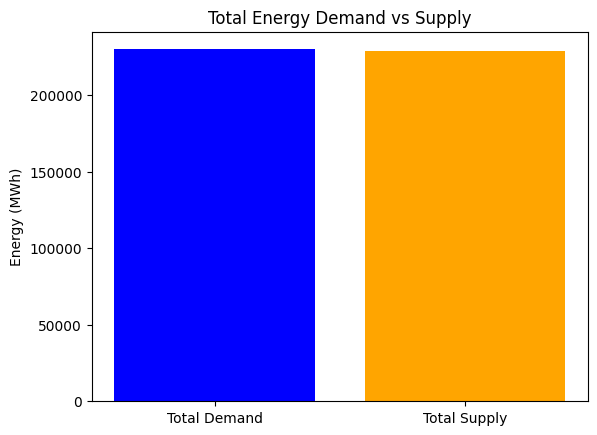


Data Analyst: Analyzing energy demand and supply by quarter...


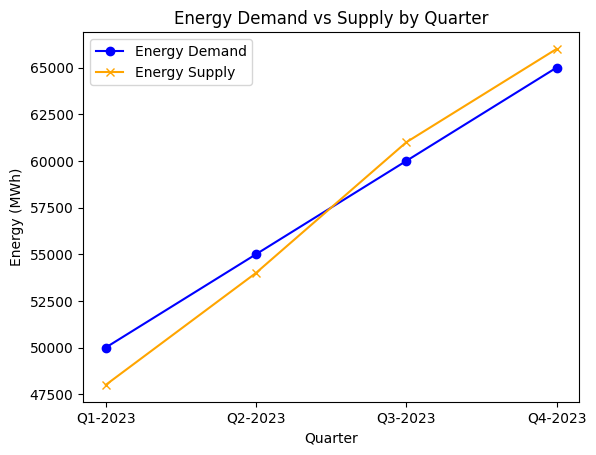

In [ ]:
# Data Analyst Agent: responsible for analyzing and visualizing energy supply/demand trends
class DataAnalyst(Agent):
    def __init__(self, name):
        self.name = name

    def analyze_energy(self, data):
        """Analyzes the total energy demand and supply and generates a basic visualization."""
        print(f"\n{self.name}: Analyzing energy trends...")

        # Calculate total energy demand and supply
        total_demand = data['Energy_Demand'].sum()
        total_supply = data['Energy_Supply'].sum()

        # Print analysis result
        print(f"Total Energy Demand: {total_demand} MWh")
        print(f"Total Energy Supply: {total_supply} MWh")

        # Plot energy demand vs supply
        plt.bar(['Total Demand', 'Total Supply'], [total_demand, total_supply], color=['blue', 'orange'])
        plt.title('Total Energy Demand vs Supply')
        plt.ylabel('Energy (MWh)')
        plt.show()

    def analyze_by_quarter(self, data):
        """Analyzes energy demand and supply by quarter and creates a visualization."""
        print(f"\n{self.name}: Analyzing energy demand and supply by quarter...")

        # Plot energy demand vs supply by quarter
        plt.plot(data['Quarter'], data['Energy_Demand'], label='Energy Demand', marker='o', color='blue')
        plt.plot(data['Quarter'], data['Energy_Supply'], label='Energy Supply', marker='x', color='orange')
        plt.title('Energy Demand vs Supply by Quarter')
        plt.xlabel('Quarter')
        plt.ylabel('Energy (MWh)')
        plt.legend()
        plt.show()

# Example Usage
data = {
    'Quarter': ['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023'],
    'Energy_Demand': [50000, 55000, 60000, 65000],
    'Energy_Supply': [48000, 54000, 61000, 66000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Instantiate the Data Analyst
da = DataAnalyst(name="Data Analyst")

# Perform analysis on the total energy data
da.analyze_energy(df)

# Perform analysis on energy data by quarter
da.analyze_by_quarter(df)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Data Scientist Agent: responsible for developing a forecasting model for energy supply and demand
class DataScientist(Agent):
    def __init__(self, name):
        self.name = name

    def build_forecast_model(self, data):
        """Builds a linear regression model to forecast energy demand and supply."""
        print(f"\n{self.name}: Developing energy forecasting model...")

        # Convert the quarters into a numerical format (e.g., Q1 -> 1, Q2 -> 2, etc.)
        quarters = np.array([1, 2, 3, 4]).reshape(-1, 1)  # Reshaping for sklearn

        # Extract energy demand and supply as target variables
        energy_demand = data['Energy_Demand'].values
        energy_supply = data['Energy_Supply'].values

        # Create and train the linear regression models for demand and supply
        demand_model = LinearRegression().fit(quarters, energy_demand)
        supply_model = LinearRegression().fit(quarters, energy_supply)

        # Forecast energy demand and supply for the next 3 quarters (Q5, Q6, Q7)
        future_quarters = np.array([5, 6, 7]).reshape(-1, 1)
        future_demand = demand_model.predict(future_quarters)
        future_supply = supply_model.predict(future_quarters)

        # Display forecast results
        print(f"Forecasted Energy Demand for next quarters: {future_demand}")
        print(f"Forecasted Energy Supply for next quarters: {future_supply}")

        # Return the forecasted results
        return future_demand, future_supply

# Example Usage
data = {
    'Quarter': ['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023'],
    'Energy_Demand': [50000, 55000, 60000, 65000],
    'Energy_Supply': [48000, 54000, 61000, 66000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Instantiate the Data Scientist
ds = DataScientist(name="Data Scientist")

# Build the forecasting model
predicted_demand, predicted_supply = ds.build_forecast_model(df)


Data Scientist: Developing energy forecasting model...
Forecasted Energy Demand for next quarters: [70000. 75000. 80000.]
Forecasted Energy Supply for next quarters: [72500. 78600. 84700.]


In [ ]:
class BusinessAnalyst(Agent):
    def __init__(self, name):
        super().__init__(name)

    def interpret_forecast(self, predicted_demand, predicted_supply):
        """Interprets the forecasted energy demand and supply to generate insights."""
        print(f"\n{self.name}: Interpreting forecast results...")

        # Check if the forecasted supply meets the demand for each future quarter
        recommendations = []
        for i in range(len(predicted_demand)):
            if predicted_supply[i] > predicted_demand[i]:
                recommendation = f"Q{i+5}: Supply exceeds demand by {predicted_supply[i] - predicted_demand[i]:.2f} MWh."
            elif predicted_demand[i] > predicted_supply[i]:
                recommendation = f"Q{i+5}: Demand exceeds supply by {predicted_demand[i] - predicted_supply[i]:.2f} MWh."
            else:
                recommendation = f"Q{i+5}: Supply matches demand. No action needed."
            recommendations.append(recommendation)

        # General insight based on trends
        avg_demand_growth = (predicted_demand[-1] - predicted_demand[0]) / predicted_demand[0] * 100
        avg_supply_growth = (predicted_supply[-1] - predicted_supply[0]) / predicted_supply[0] * 100

        # Generate the GPT dynamic report using ChatCompletion API
        self.generate_gpt_dynamic_report(avg_demand_growth, avg_supply_growth, recommendations)

    def generate_gpt_dynamic_report(self, demand_growth, supply_growth, recommendations):
        """Generates a detailed GPT report based on the forecast data using GPT-4 or GPT-3.5-turbo."""
        prompt = (
            f"The energy demand has grown by {demand_growth:.2f}% and the supply by {supply_growth:.2f}% over the next 3 quarters. "
            f"Here are the specific insights and recommendations:\n\n"
            f"{' '.join(recommendations)}\n\n"
            "Please summarize these insights and provide recommendations for optimizing energy management in the city of Chicago."
        )

        try:
            # Call Chat API with the correct model (gpt-3.5-turbo or gpt-4)
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[
                    {"role": "system", "content": "You are a skilled energy analyst providing insights."},
                    {"role": "user", "content": prompt}
                ],
                max_tokens=150
            )

            # Extract the GPT-generated report
            gpt_report = response['choices'][0]['message']['content'].strip()
            print("Generated GPT Report:\n", gpt_report)
        except Exception as e:
            print(f"Error during GPT report generation: {e}")

# Example Usage
predicted_demand = [70000, 75000, 80000]
predicted_supply = [72500, 78600, 84700]

# Instantiate the Business Analyst
ba = BusinessAnalyst(name="Business Analyst")

# Call the Business Analyst to interpret the forecasted demand and supply
ba.interpret_forecast(predicted_demand, predicted_supply)


Business Analyst: Interpreting forecast results...
Generated GPT Report:
 Insights:
A continual increase is observed in both the demand and supply of energy in the city of Chicago over the next three quarters. Notably, the supply of energy seems to be outpacing the demand in consecutive quarters (Q5, Q6, and Q7). In Q5, there is a surplus of 2500 MWh, which increases by 1100 MWh in Q6 and a further 1100 MWh in Q7, reaching a maximum excess of 4700 MWh.

Recommendations:
1. Curtailment Measures: Considering the surplus energy, the city must look into proactive curtailment measures. This can include temporary shut-down of power plants or reducing their output.

2. Energy Storage:


In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Frontend Developer Agent: responsible for building the interface for data visualizations
class FrontendDeveloper(Agent):
    def __init__(self, name):
        self.name = name

    def build_interface(self, historical_data, predicted_demand, predicted_supply):
        """Creates an interface using Streamlit for visualizing energy demand and supply data."""
        st.title("Energy Demand and Supply Forecast Dashboard")

        # Display historical data
        st.subheader("Historical Energy Data")
        st.write(historical_data)

        # Create a combined dataset of historical and predicted data
        quarters = historical_data['Quarter'].tolist()
        future_quarters = [f"Q{i+5}" for i in range(len(predicted_demand))]
        quarters.extend(future_quarters)

        # Append forecasted data to historical data
        energy_demand = historical_data['Energy_Demand'].tolist()
        energy_supply = historical_data['Energy_Supply'].tolist()
        energy_demand.extend(predicted_demand)
        energy_supply.extend(predicted_supply)

        # Plot the forecast
        st.subheader("Energy Demand and Supply Forecast")
        fig, ax = plt.subplots()
        ax.plot(quarters, energy_demand, label="Energy Demand", marker='o', color='blue')
        ax.plot(quarters, energy_supply, label="Energy Supply", marker='x', color='orange')
        ax.set_title('Energy Demand and Supply Over Time')
        ax.set_xlabel('Quarter')
        ax.set_ylabel('Energy (MWh)')
        plt.xticks(rotation=45)
        ax.legend()
        st.pyplot(fig)

        # Provide summary reports
        st.subheader("Summary")
        st.write(f"Forecasted Energy Demand: {predicted_demand}")
        st.write(f"Forecasted Energy Supply: {predicted_supply}")

# Example Usage:

# Historical data for comparison
historical_data = {
    'Quarter': ['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023'],
    'Energy_Demand': [50000, 55000, 60000, 65000],
    'Energy_Supply': [48000, 54000, 61000, 66000]
}

# Create a DataFrame for historical data
historical_df = pd.DataFrame(historical_data)

# Forecast predictions (from Business Analyst's forecast)
predicted_demand = [70000, 75000, 80000]
predicted_supply = [72500, 78600, 84700]

# Instantiate the Frontend Developer
fd = FrontendDeveloper(name="Frontend Developer")

# Run the Streamlit app (this is called in a Python script outside of Jupyter Notebooks)
fd.build_interface(historical_df, predicted_demand, predicted_supply)


In [ ]:
# Define the agents
pm = ProjectManager(name="Project Manager")
de = DataEngineer(name="Data Engineer")
da = DataAnalyst(name="Data Analyst")
ds = DataScientist(name="Data Scientist")
ba = BusinessAnalyst(name="Business Analyst")
# fd = FrontendDeveloper(name="Frontend Developer")

# Example historical data (to be used by Data Engineer)
historical_data = {
    'Quarter': ['Q1-2023', 'Q2-2023', 'Q3-2023', 'Q4-2023'],
    'Energy_Demand': [50000, 55000, 60000, 65000],
    'Energy_Supply': [48000, 54000, 61000, 66000]
}

# Create a DataFrame for the historical data
df = pd.DataFrame(historical_data)

# Simulate the workflow

# Project Manager assigns task to Data Engineer
pm.assign_task("Prepare the energy data", de)

# Data Engineer prepares the data
prepared_data = de.prepare_data(df)

# Data Analyst analyzes the data
da.analyze_energy(prepared_data)

# Data Scientist forecasts energy consumption
predicted_demand, predicted_supply = ds.build_forecast_model(prepared_data)
print(f"Predicted Energy Demand: {predicted_demand}")
print(f"Predicted Energy Supply: {predicted_supply}")

# Business Analyst interprets the forecast
ba.interpret_forecast(predicted_demand, predicted_supply)

# Frontend Developer creates the UI for displaying predictions
# fd.build_interface(prepared_data, predicted_demand, predicted_supply)
